<a href="https://colab.research.google.com/github/ChristopherJonathan0/Heart-Disease-Analysis-and-Prediction-Using-Logistic-Regression-and-EDA/blob/main/Heart_Disease_Analysis_and_Prediction_Using_Logistic_Regression_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Fundamental of Data Engineering/processed.cleveland.data')
df1.describe()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


    'age',        # umur
    'sex',        # jenis kelamin
    'cp',         # tipe nyeri dada
    'trestbps',   # tekanan darah istirahat
    'chol',       # kolesterol
    'fbs',        # gula darah puasa
    'restecg',    # hasil EKG
    'thalach',    # detak jantung maksimum
    'exang',      # nyeri dada akibat olahraga
    'oldpeak',    # depresi ST
    'slope',      # kemiringan segmen ST
    'ca',         # jumlah pembuluh utama
    'thal',       # status thalassemia
    'target'      # diagnosis penyakit jantung

In [ ]:
# Ubah nama kolom
df1.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]


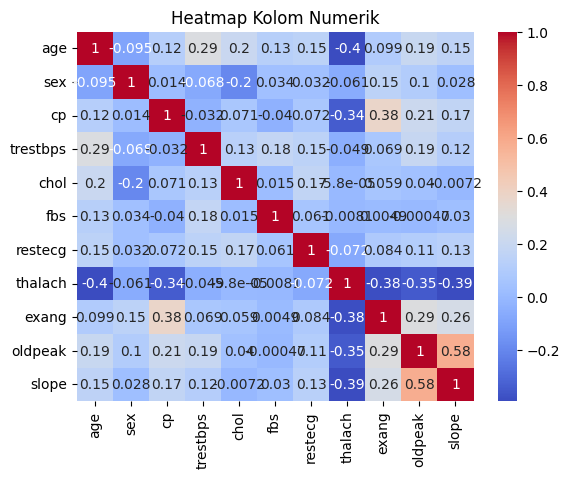

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.heatmap(df1.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Kolom Numerik')
plt.figure(figsize=(10, 10))
plt.show()


In [ ]:
df1.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df1['target'].value_counts()

,count
target,
0,163
1,55
2,36
3,35
4,13


<Axes: xlabel='target'>

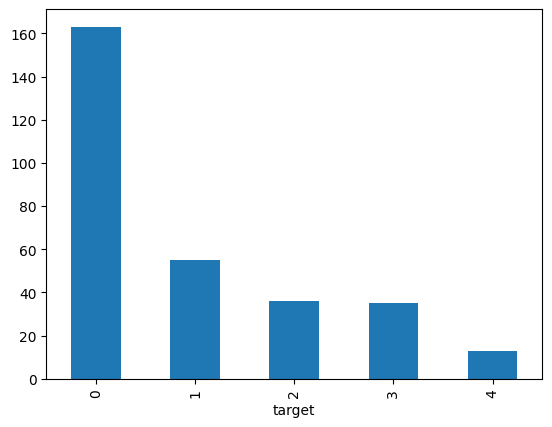

In [ ]:
df1['target'] = df1['target'].astype('category', copy=False)
df1['target'].value_counts().plot(kind='bar')

In [ ]:
# cek apakah masih ada tanda '?'
(df1 == '?').sum()
df1.replace('?', np.nan, inplace=True)
df1.dropna(inplace=True)

X = df1[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df1['target']
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
model = lm.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=5000,
                   multi_class='multinomial', random_state=42)

In [ ]:
print(model.coef_)

[[ 5.03903111e-02 -5.79814912e-01 -4.47545720e-01 -1.61859514e-02
   5.99109667e-04  1.56856999e-01 -3.36049253e-01  2.38491163e-02
  -5.83919164e-01 -7.14749038e-01 -3.06762110e-01 -1.42784902e+00
  -2.86718127e-01]
 [ 5.80924937e-03  2.02402243e-03  2.78515635e-02  9.64839852e-04
   6.14773927e-03 -4.23922294e-01 -1.40279288e-01 -2.75610892e-03
   9.97545029e-02 -5.91558173e-02 -2.45093878e-01 -2.30709801e-01
  -6.58305268e-02]
 [ 9.24266807e-03  5.07246189e-01  5.51267818e-01  5.25215972e-03
   8.86879617e-03  6.36440142e-01 -2.05898629e-01 -1.05833675e-02
   3.35741762e-01  2.66854552e-01 -6.27437243e-01  3.01235029e-01
  -6.72596014e-02]
 [-8.36655868e-02 -1.17968818e-01  3.44831864e-01 -8.36738699e-03
  -1.14055117e-03  9.43920911e-01  2.21063644e-02 -1.73994960e-02
  -1.66632607e-01  2.58299944e-01  4.45320516e-01  9.51377064e-01
   1.63855355e-01]
 [ 1.82233583e-02  1.88513519e-01 -4.76405525e-01  1.83363388e-02
  -1.44750939e-02 -1.31329576e+00  6.60120806e-01  6.88985613e-03


In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0 2 0 2 2 0 0 3 0 0 0 4 4 0 3 4 0 0 3 0 0 2 2 1 0 3 0 0 0 4 0 0 0 0 0 0 0
 2 0 3 0 4 1 3 1 0 0 0 0 1 0 0 2 4 0 0 0 3 3 0 3 0 0 3 0 0 1 4 1 2 1 2 0 1
 1 3 2 0 0 0 1 3 2 0 3 4 2 4 3 0 0 1 0 0 3 0 2 0 0 0 0 0 3 2 1 0 1 0 0 1 0
 4 3 1 2 1 1 0 1 0 2 0 4 0 2 0 1 4 3 0 0 1 0 0 1 0 0 0 0 0 0 0 3 3 0 1 0 4]


<Axes: >

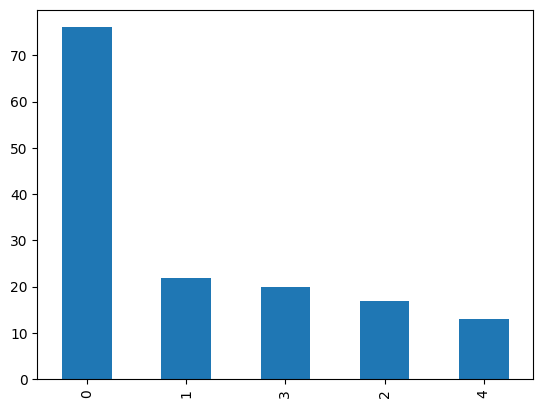

In [ ]:
y_pred_series = pd.Series(y_pred)

y_pred_series = y_pred_series.astype('category', copy=False)

y_pred_series.value_counts().plot(kind='bar')

In [ ]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
278,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0
156,58.0,1.0,4.0,125.0,300.0,0.0,2.0,171.0,0.0,0.0,1.0,2.0,7.0
84,44.0,1.0,3.0,140.0,235.0,0.0,2.0,180.0,0.0,0.0,1.0,0.0,3.0
82,68.0,1.0,3.0,180.0,274.0,1.0,2.0,150.0,1.0,1.6,2.0,0.0,7.0
264,42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0


In [ ]:
y_test.head(3)

,target
278,0
156,1
84,0


In [ ]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[68 11  1  3  4]
 [ 8  6  5  1  3]
 [ 0  4  3  6  4]
 [ 0  1  6  8  1]
 [ 0  0  2  2  1]]

Accuracy: 0.581081081081081

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        87
           1       0.27      0.26      0.27        23
           2       0.18      0.18      0.18        17
           3       0.40      0.50      0.44        16
           4       0.08      0.20      0.11         5

    accuracy                           0.58       148
   macro avg       0.36      0.38      0.37       148
weighted avg       0.63      0.58      0.60       148

